In [1]:
import seaborn as sns
import pandas as pd
import numpy as np


Data collection

In [51]:
batches = []
cost = []
model = []
status = []
optimization = []

for batch_size in range(1, 13):
    model_data = pd.read_json(f"../output/ilp_with_snowset/ilp/test_snowflake_{batch_size}.json")
    model_data = model_data[model_data['status'] != 5]

    if len(model_data):
        cost.append(model_data['total_cost'].mean())
        batches.append(batch_size)
        model.append("Multi-tenancy (equally shared bandwidth)")

    # model_data = pd.read_json(f"../output/ilp_with_snowset/ilp_bw/test_snowflake_{batch_size}.json")
    # model_data = model_data[model_data['status'] != 5]
    #
    # if len(model_data):
    #     cost.append(model_data['total_cost'].mean())
    #     batches.append(batch_size)
    #     model.append("Multi-tenancy (proportionally shared bandwidth)")


    cost.append(model_data['total_cost_separated'].mean())
    batches.append(batch_size)
    model.append("Queries ran on individual instances")

data = pd.DataFrame(
    data={
        "batch_size": batches,
        "cost": cost,
        "model": model
    }
)

data

,batch_size,cost,model
0,1,0.008119,Multi-tenancy (equally shared bandwidth)
1,1,0.008119,Queries ran on individual instances
2,2,0.009303,Multi-tenancy (equally shared bandwidth)
3,2,0.009495,Queries ran on individual instances
4,3,0.010730,Multi-tenancy (equally shared bandwidth)
5,3,0.010975,Queries ran on individual instances
6,4,0.010736,Multi-tenancy (equally shared bandwidth)
7,4,0.011391,Queries ran on individual instances
8,5,0.010758,Multi-tenancy (equally shared bandwidth)
9,5,0.012680,Queries ran on individual instances


[Text(0.5, 1.0, 'Average Cost by Batch Size (time=200s)'),
 Text(0.5, 0, 'Batch Size'),
 Text(0, 0.5, 'Average Cost (USD)')]

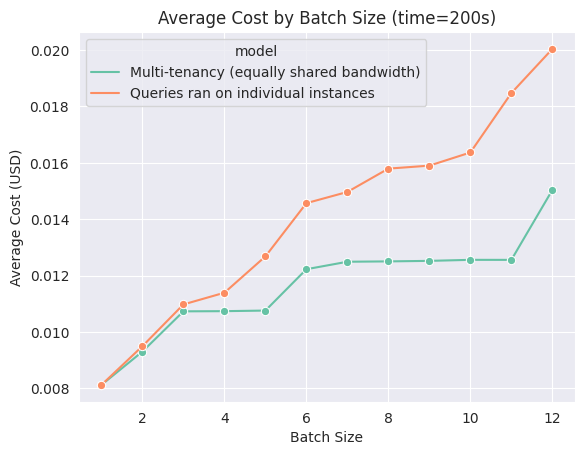

In [55]:
sns.set_palette("Set2")

plt = sns.lineplot(data=data, x='batch_size', y="cost", hue="model",  marker='o')
plt.set(title="Average Cost by Batch Size (time=200s)", xlabel="Batch Size", ylabel="Average Cost (USD)")


In [4]:
def calc_opt(row):
    return (row["total_cost_separated"] - row["total_cost"])/row["total_cost_separated"] * 100

In [31]:
batches = []
opt = []
model = []
status = []
optimization = []

for batch_size in range(1, 20):
    model_data = pd.read_json(f"../output/ilp_with_snowset/ilp/test_snowflake_{batch_size}.json")
    model_data = model_data[model_data['status'] != 5]

    if len(model_data):
        opt.append(model_data.apply(calc_opt, axis=1).mean())
        batches.append(batch_size)
        model.append("Integer Linear Programming Model")

    model_data = pd.read_json(f"../output/ilp_with_snowset/ilp_bw/test_snowflake_{batch_size}.json")
    model_data = model_data[model_data['status'] != 5]

    if len(model_data):
        opt.append(model_data.apply(calc_opt, axis=1).mean())
        batches.append(batch_size)
        model.append("Alternative Integer Linear Programming Model")


data = pd.DataFrame(
    data={
        "batch_size": batches,
        "opt": opt,
        "model": model
    }
)

data

,batch_size,opt,model
0,1,1.394293e-14,Integer Linear Programming Model
1,1,1.394293e-14,Alternative Integer Linear Programming Model
2,2,1.607034e+01,Integer Linear Programming Model
3,2,1.604506e+01,Alternative Integer Linear Programming Model
4,3,9.250054e+00,Integer Linear Programming Model
5,3,9.277360e+00,Alternative Integer Linear Programming Model
6,4,1.955924e+01,Integer Linear Programming Model
7,4,1.969976e+01,Alternative Integer Linear Programming Model
8,5,3.089925e+01,Integer Linear Programming Model
9,5,3.093189e+01,Alternative Integer Linear Programming Model


In [34]:
data[data["model"]=="Integer Linear Programming Model"]["opt"].mean()

22.009539146014774

In [35]:
data[data["model"]=="Alternative Integer Linear Programming Model"]["opt"].mean()


19.6258653749325

[Text(0.5, 1.0, 'Cost by batch sizes'),
 Text(0.5, 0, 'Batch Size'),
 Text(0, 0.5, 'Cost (USD)')]

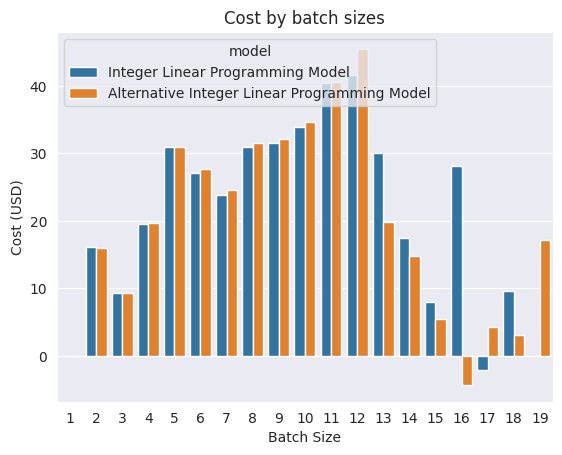

In [23]:
plt = sns.barplot(data=data, x='batch_size', y="opt", hue="model")
plt.set(title="Cost Optimization by batch sizes", xlabel="Batch Size", ylabel="Cost (USD)")

In [12]:
def calc_opt(row):
    return (row["total_cost_separated"] - row["total_cost"])/row["total_cost_separated"] * 100

In [13]:
batches = []
optimization = []
status = []

for batch_size in range(1, 20):
    model_data = pd.read_json(f"../output/ilp_with_snowset/ilp/test_snowflake_{batch_size}.json")
    model_data = model_data[model_data['status'] != 5]

    if len(model_data):
        model_data["optimization"] = model_data.apply(calc_opt, axis=1)
        res = model_data[["status", "optimization"]].groupby("status").agg([np.mean])
        if len(res) == 2:
            for s in [0, 3]:
                batches.append(batch_size)
                status.append("Optimal" if s==0 else "Feasible")
                optimization.append(res.loc[s]["optimization"]["mean"])


data = pd.DataFrame(
    data={
        "batch_size": batches,
        "status": status,
        "optimization": optimization
    }
)
data

,batch_size,status,optimization
0,9,Optimal,35.520187
1,9,Feasible,7.521276
2,10,Optimal,42.706974
3,10,Feasible,12.056060
4,11,Optimal,50.200182
5,11,Feasible,27.334191
6,12,Optimal,53.109194
7,12,Feasible,39.657418


In [24]:
plt = sns.barplot(data=data, x='batch_size', y="optimization", hue="status")
plt.set(title="Cost optimization by batch size", xlabel="Batch Size", ylabel="Cost Optimization (%)")

ValueError: Could not interpret input 'optimization'